# Predict the Month through London Weather

Author: Jie Lin

Course Project, UC Irvine, Math 10, S22

## Introduction

In this project, I tried to use the dataset "london_weather" to explore how can we predict the specific month of london through serveral weather factors. Besides, I also explored the importance of each factor in predicting months. In addition, I explored the most common mistakes in predicting months.

## Main portion of the project

(You can either have all one section or divide into multiple sections)

Here, I import the necessary library for this project.

In [ ]:
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

First, I need to download the dataset and deal with same data in this dataset.

In [ ]:
df = pd.read_csv('london_weather.csv')

Here, I remove all the missing values in this dataset.

In [ ]:
df=df.dropna() 

In [ ]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14970,20191227,8.0,0.0,12.0,9.6,7.5,6.6,0.0,102880.0,0.0
14971,20191228,8.0,0.0,12.0,9.9,8.1,6.6,0.0,103630.0,0.0
14972,20191229,6.0,2.2,29.0,11.5,8.7,7.4,0.0,103360.0,0.0
14973,20191230,0.0,3.6,37.0,9.3,6.5,1.5,0.0,102970.0,0.0


In [ ]:
df.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

Then I covert number in the column named "date" to a pandas datetime object. 

In [ ]:
df["date"]=pd.to_datetime(df["date"], format='%Y%m%d')

I plan to find out all the columns with numbers and arrange the name of these columns as a set. 

In [ ]:
num_cols = [c for c in df.columns if is_numeric_dtype(df[c])]

In [ ]:
num_cols

['cloud_cover',
 'sunshine',
 'global_radiation',
 'max_temp',
 'mean_temp',
 'min_temp',
 'precipitation',
 'pressure',
 'snow_depth']

Then I plan to add a new column named "Month", which contains the correspondintg month to the datetime in the "date" column.

In [ ]:
df["Month"]=df["date"].dt.month

In [ ]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Month
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
14970,2019-12-27,8.0,0.0,12.0,9.6,7.5,6.6,0.0,102880.0,0.0,12
14971,2019-12-28,8.0,0.0,12.0,9.9,8.1,6.6,0.0,103630.0,0.0,12
14972,2019-12-29,6.0,2.2,29.0,11.5,8.7,7.4,0.0,103360.0,0.0,12
14973,2019-12-30,0.0,3.6,37.0,9.3,6.5,1.5,0.0,102970.0,0.0,12


Here I create a copy of df and I plan to use this copy in the following steps.

In [ ]:
df1=df.copy()
df2=df.copy()
df3=df.copy()

### Using Logistic Regression to Predict

Then, I plan to use all columns that contains numbers related to the weather of different days to predict the possible month of each day by using LogisticRegression.

In [ ]:
reg=LogisticRegression()

In [ ]:
reg.fit(df[num_cols],df["Month"])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Then I create a new column named "Pred" which contains the values that Logistic Regression predict the corresponding months to days by the data from the columns that contains data related to the weather of a day.

In [ ]:
df1["Pred"]=reg.predict(df[num_cols])

In [ ]:
df1

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Month,Pred
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1,2
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1,1
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1,12
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1,12
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14970,2019-12-27,8.0,0.0,12.0,9.6,7.5,6.6,0.0,102880.0,0.0,12,12
14971,2019-12-28,8.0,0.0,12.0,9.9,8.1,6.6,0.0,103630.0,0.0,12,12
14972,2019-12-29,6.0,2.2,29.0,11.5,8.7,7.4,0.0,103360.0,0.0,12,1
14973,2019-12-30,0.0,3.6,37.0,9.3,6.5,1.5,0.0,102970.0,0.0,12,11


Here I compare the data of true month of days to the data of predict months of days.

In [ ]:
pd.Series(df1['Pred']==df1['Month']).astype(float).mean()

0.2786968142743625

From the result of the comparision of the data of true months of days to the data of predict months of days, we could see that there are only 27.8698% rows matches to each other, which is a low percetage, which reveals that Logistic Regression may not be a good way to predict the month.

### Using Decision Tree Classifier to Predict

since we found out that LogisticRegression does not work well for predicting the corresponding months, I plan to try to use DecisionTreeClassifier to predict the corresponding month.

First, I make a new copy of df and build the train and test sets.

In [ ]:
df2=df.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df2[num_cols],
    df2["Month"],
    test_size=0.2,
    random_state=0
)

In [ ]:
for nodes in range(100,5000,50):
    clf = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=nodes)
    clf.fit(X_train, y_train)
    a = clf.score(X_train, y_train)
    b = clf.score(X_test, y_test)
    print (a,b)# not overfitting


0.6396965865992414 0.5868544600938967
0.6854795015351274 0.625496569158541
0.7125699837457107 0.647887323943662
0.7327975437962796 0.656554712892741
0.7467942929384143 0.659443842542434
0.7564565649268556 0.6601661249548574
0.7650352176268738 0.6576381365113759
0.7716272349647824 0.6569158540989527
0.7769550297995305 0.6587215601300108
0.7812895069532237 0.6598049837486457
0.7832761423153333 0.6587215601300108
0.7834567455300704 0.6561935716865295
0.7833664439227018 0.6569158540989527
0.7832761423153333 0.659443842542434
0.7835470471374391 0.6587215601300108
0.7834567455300704 0.6590827013362225
0.7832761423153333 0.6576381365113759
0.7832761423153333 0.6572769953051644
0.7834567455300704 0.6583604189237992
0.7834567455300704 0.6587215601300108
0.7834567455300704 0.6583604189237992
0.7832761423153333 0.6590827013362225
0.7831858407079646 0.659443842542434
0.7833664439227018 0.659443842542434
0.7834567455300704 0.6572769953051644
0.7836373487448076 0.6583604189237992
0.7833664439227018 

From the result of above code, we could see that when max_leaf_nodes in the range (100,5000) with interval 50, the possibility that train data predict correctly is always around 0.78 while the possibility that the test data predict correctly is always around 0.65 to 0.66. therefore, there does not exist overfiting. 

Since there is no overfiting, i randomly picks one value from range (100,500) with interval 50 and I want to use this setting to draw a picture of the decision tree.

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=600)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=600)

In [ ]:
clf.score(X_train, y_train)

0.7831858407079646

In [ ]:
clf.score(X_test, y_test)

0.6579992777175876

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
import matplotlib.pyplot as plt

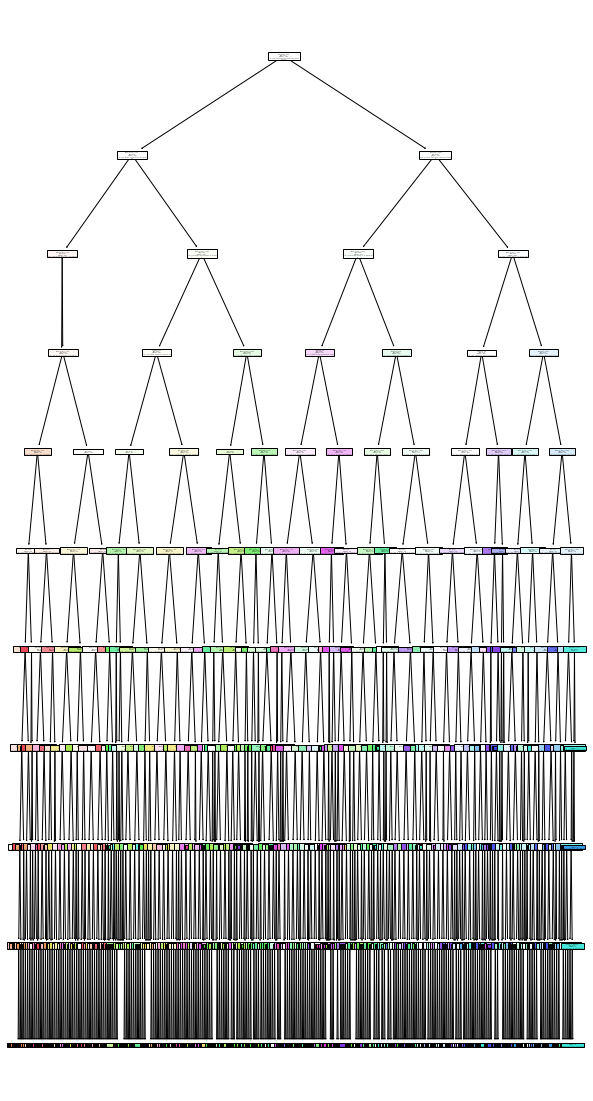

In [ ]:
fig = plt.figure(figsize=(10,20))
plot_tree(
    clf,
    feature_names=clf.feature_names_in_,
    filled=True
);

### Figure out Importance of Each Factor 

Then, I am a little curious about the importance of each weather factor in predicting the month. Therefore, plan to figure out the importance of each weather factor in predicting the weather.

In [ ]:
pd.Series(clf.feature_importances_, index=num_cols)

cloud_cover         0.008456
sunshine            0.321073
global_radiation    0.410099
max_temp            0.133289
mean_temp           0.074589
min_temp            0.031777
precipitation       0.006093
pressure            0.014625
snow_depth          0.000000
dtype: float64

In [ ]:
df_feat = pd.DataFrame({"importance": clf.feature_importances_, "feature": clf.feature_names_in_})

In [ ]:
alt.Chart(df_feat).mark_bar().encode(
    x="importance",
    y="feature"
).properties(
    title = 'Feature Importance'
)

alt.Chart(...)

From the code of the above result, we could see that the most two importance weather factors in prediciting months is global_radiation and sunshine.

In [ ]:
f1 = []
for i in y_test.index:
    f1.append(df['sunshine'][i])

f2 = []
for i in y_test.index:
    f2.append(df['global_radiation'][i])

f3 = []
for i in y_test.index:
    f3.append(df['date'][i])

In [ ]:
df_true = pd.DataFrame()
df_true['sunshine'] = f1
df_true['global_radiation'] = f2
df_true['date']=f3
df_true['Month'] = list(y_test)

In [ ]:
df_pred = pd.DataFrame()
df_pred['sunshine'] = f1
df_pred['global_radiation'] = f2
df_pred['date']=f3
df_pred['Predict'] = clf.predict(X_test)

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [ ]:
sel = alt.selection_single(fields=["Month"])
sel1 = alt.selection_single(fields=["Predict"])

In [ ]:
c1=alt.Chart(df_true).mark_circle().encode(
    x=alt.X("sunshine", scale=alt.Scale(zero=False)),
    y=alt.Y("global_radiation", scale=alt.Scale(zero=False)),
    color=alt.Color("Month:O",scale=alt.Scale(scheme="sinebow")),
    tooltip=["date","sunshine","global_radiation"],
    size=alt.condition(sel, alt.value(40),alt.value(10))
).add_selection(sel)


c1 represents the dot graph with the original data of month and exlpore the relationship between sunshine and global radition.

In [ ]:
c2=alt.Chart(df_pred).mark_circle().encode(
    x=alt.X("sunshine", scale=alt.Scale(zero=False)),
    y=alt.Y("global_radiation", scale=alt.Scale(zero=False)),
    color=alt.Color("Predict:O",scale=alt.Scale(scheme="sinebow")),
    tooltip=["date","sunshine","global_radiation"],
    size=alt.condition(sel1, alt.value(40),alt.value(10))
).add_selection(sel1)


c2 represents the dot graph with the predicted data of month and exlpore the relationship between sunshine and global radition.

In [ ]:
c1|c2

alt.HConcatChart(...)

we can see that the difference between the original data and predicted data are not very clear in the above two dot graphs. Therefore, I plan to try to use bar graph to see whether the difference between the original data and predicted data could be clearer.

In [ ]:
c3=alt.Chart(df_true).mark_bar().encode(
    x=alt.X("sunshine", scale=alt.Scale(zero=False)),
    y=alt.Y("global_radiation", scale=alt.Scale(zero=False)),
    color=alt.Color("Month:N",scale=alt.Scale(scheme="sinebow")),
    tooltip=["date","sunshine","global_radiation"],
    size=alt.condition(sel, alt.value(40),alt.value(10))
).add_selection(sel)


c3 represents the bar graph with the original data of month and exlpore the relationship between sunshine and global radition.

In [ ]:
c4=alt.Chart(df_pred).mark_bar().encode(
    x=alt.X("sunshine", scale=alt.Scale(zero=False)),
    y=alt.Y("global_radiation", scale=alt.Scale(zero=False)),
    color=alt.Color("Predict:N",scale=alt.Scale(scheme="sinebow")),
    tooltip=["date","sunshine","global_radiation"],
    size=alt.condition(sel1, alt.value(40),alt.value(10))
).add_selection(sel1)


c4 represents the bar graph with the predicted data of month and exlpore the relationship between sunshine and global radition.

In [ ]:
c3|c4

alt.HConcatChart(...)

We could see that in the bar graph, the difference between the true results and predict results become more clear.

### Find out the Specific Failures

In this part, I try to figure out the most frequent mistakes that could happen to the prediction.

First, I combined the previous two datasets so I could compare the true months and the results of the predictions.

In [ ]:
df_test=df_true.merge(df_pred, how="inner", on=["sunshine","global_radiation","date"])

In [ ]:
df_test

,sunshine,global_radiation,date,Month,Predict
0,9.1,266.0,2013-06-29,6,7
1,0.0,19.0,1989-11-13,11,11
2,2.9,166.0,1987-06-22,6,7
3,2.6,102.0,2015-03-24,3,3
4,1.3,49.0,2009-10-22,10,10
...,...,...,...,...,...
2764,0.0,29.0,2015-10-19,10,10
2765,0.6,104.0,1980-07-20,7,6
2766,8.7,146.0,2012-09-29,9,9
2767,6.8,210.0,1990-08-07,8,8


Then I create a new dataset which contains the rows where the true months and the results of predictions are not the same.

In [ ]:
df_test1=df_test[df_test["Month"]!=df_test["Predict"]]

Next, I sort the values in the new sets, which will help me get the appearance times of each different combination of true months and the results of the predictions.

In [ ]:
count=df_test1.groupby(["Month","Predict"]).size().sort_values(ascending=False)

I create a new dataframe for the appearance times of each different combination of true months and the results of the predictions.

In [ ]:
df_mistake=pd.DataFrame({"count":count})

In [ ]:
df_mistake.reset_index(inplace=True)

In [ ]:
df_mistake

,Month,Predict,count
0,1,11,66
1,6,7,64
2,11,1,56
3,7,6,55
4,12,1,51
5,1,12,48
6,8,7,45
7,2,11,39
8,10,2,35
9,6,5,35


From the result of the above code, we could clearly see the appearance times of each mistake prediction and know what is the most easily happen mistake prediction. In order to have a more direct and better understanding of the above data, I plan to use a bar graph to further show the different types of mistake predictions and the appearance times of each type.

In [ ]:
sel3 = alt.selection_single(fields=['Predict'])
alt.Chart(df_mistake).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x='Month:O',
    y='count:Q',
    color='Predict:O',
    tooltip = ["Month","Predict", "count"],
    opacity=alt.condition(sel3, alt.value(1), alt.value(0.2))
).properties(
    title="predict mistakes",
    width=600,
    height=500,
).add_selection(
    sel3
)

alt.Chart(...)

### Use KNeighborsClassifier to predict with the most Two Important factors

Finally, I plan to use KNeighborsClassifier to predict month using data from the column named "sunshine" and "global_radiation" and figure out the accurancy.

In [ ]:
g=df3[["sunshine","global_radiation"]]

In [ ]:
scaler = StandardScaler()
scaler.fit(g)
g = scaler.transform(g)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    g,
    df3["Month"],
    test_size=0.2,
    random_state=0
)

In [ ]:
clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train)
loss_train = log_loss(y_train, clf1.predict_proba(X_train))
loss_test = log_loss(y_test, clf1.predict_proba(X_test))

In [ ]:
print(f"The log_loss of X_train and y_train is {loss_train:.2f}")
print(f"The log_loss of X_test and y_test is {loss_test:.2f}")

The log_loss of X_train and y_train is 1.11
The log_loss of X_test and y_test is 2.55


In [ ]:
df3['predict1'] = clf1.predict(g)

In [ ]:
(df3["Month"] == df3["predict1"]).value_counts()

True     9326
False    4517
dtype: int64

In [ ]:
(df3["Month"] == df3["predict1"]).sum()/len(df3["Month"])

0.6736978978545113

Here we could see that the accuracy of the predictions is very close to the accuracy of the predictions that we previously gained by using decision tree classifier and there is no sign of overfitting, which implies that factor sunshine and global radiation are two important factors to predict the month.

## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

Through the project, we found out that the accuracy of predicting the month in London is nearly 67% in both the Decision Tree classifier and K-Nearest Neighbors Classifier and the sunshine and global radiation are the most two important factors to help us predict the month. the most easily confused weather two months are November and January.

## References

* What is the source of your dataset(s)?

kaggle. https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data

* Were any portions of the code or ideas taken from another source?  List those sources here and say how they were used.

https://altair-viz.github.io/gallery/index.html. example Gallery, which shows a bunch of different graphs. I imitate one of the codes of the graphs to draw my graph about the specific failures. 

https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/. I learned KNeighborsClassifier from this article.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=426034d3-2069-4ccf-9474-d9cd9573d807' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>